In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import time

if 'path' in locals(): os.chdir(path)
else: os.chdir("../"); path = os.getcwd()
print("The path is:", path)
path_manustript = path + "/Manuscript_Results/"
from pyMFI import MFI
from pyMFI import MFI1D
from pyMFI import run_plumed

# from matplotlib import rc
# plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["computer modern roman"], "font.size": 22})
# plw = 0.6
# pcs = 3
# pms = 3
# bfillc = [0.9,0.9,0.9]
# plt.rcParams['axes.linewidth'] = plw
# plt.rcParams['xtick.top'] = True
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['xtick.major.width'] = plw
# plt.rcParams['xtick.minor.width'] = plw
# plt.rcParams['xtick.minor.visible'] = True
# plt.rcParams['xtick.major.size'] = 4.5
# plt.rcParams['ytick.right'] = True
# plt.rcParams['ytick.direction'] = 'in'
# plt.rcParams['ytick.major.width'] = plw
# plt.rcParams['ytick.minor.width'] = plw
# plt.rcParams['ytick.minor.visible'] = True
# plt.rcParams['ytick.major.size'] = 5
# plt.rcParams["figure.figsize"] = (5,4)


The path is: /home/ucecabj/Desktop/pyMFI_git


In [3]:
os.chdir(path_manustript + "Figure1B")

# #Read the HILLS file
HILLS=MFI.load_HILLS_2D(hills_name="HILLS40")


# #Read the Colvar File
[position_x, position_y] = MFI.load_position_2D(position_name="position40")

# #Compute the time-independent mean force
NH=10000
start=time.time()
results = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 2_000, error_pace=10, WellTempered=1, nhills=NH, periodic=1)
end=time.time()
print("Time taken for MFI algorithm: ", round(time.time()-start,3), "s")

[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results

# #integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-np.pi, -np.pi)), max_grid=np.array((np.pi, np.pi)), periodic=1)

|2000/10000|==> Average Mean Force Error: 30.713383568308927
|4000/10000|==> Average Mean Force Error: 30.042455463809798
|6000/10000|==> Average Mean Force Error: 29.926621824481487
|8000/10000|==> Average Mean Force Error: 29.80179130648484
|10000/10000|==> Average Mean Force Error: 29.946020663267465
Time taken for MFI algorithm:  65.994 s


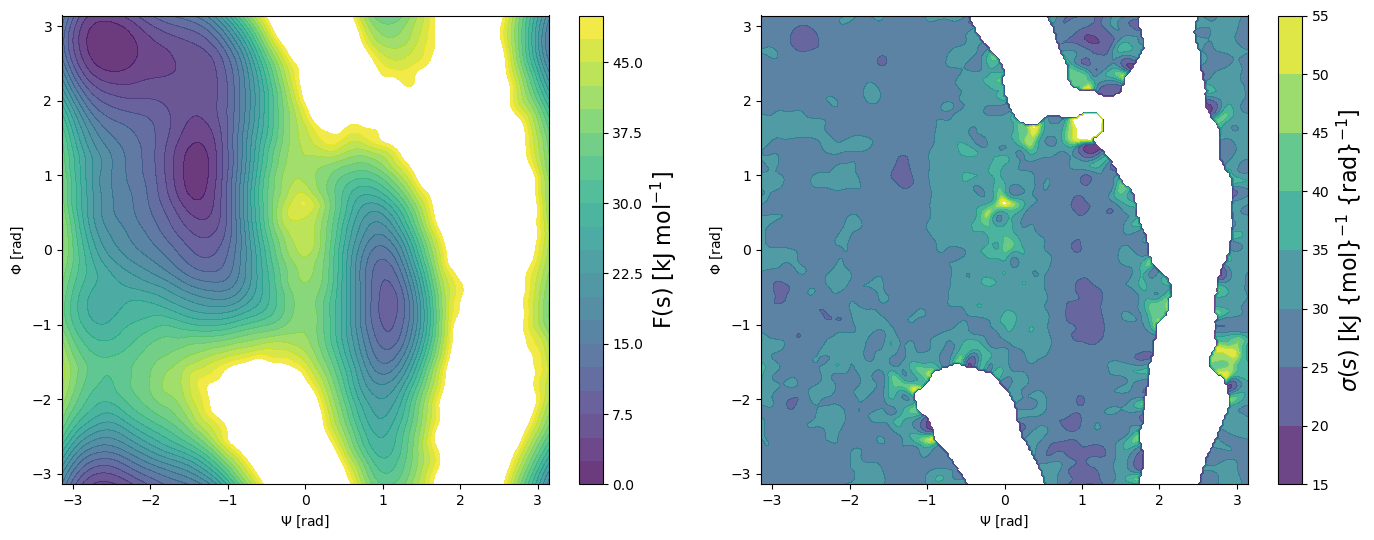

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5.5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 51, 2.5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_ylabel('$\Phi$ [rad]')
axs[0].set_xlabel('$\Psi$ [rad]')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(15, 60, 5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$ {rad}$^{-1}$]",fontsize=16)
axs[1].set_ylabel('$\Phi$ [rad]')
axs[1].set_xlabel('$\Psi$ [rad]')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()    

plt.savefig('Figure1B_1', dpi=600, bbox_inches='tight')

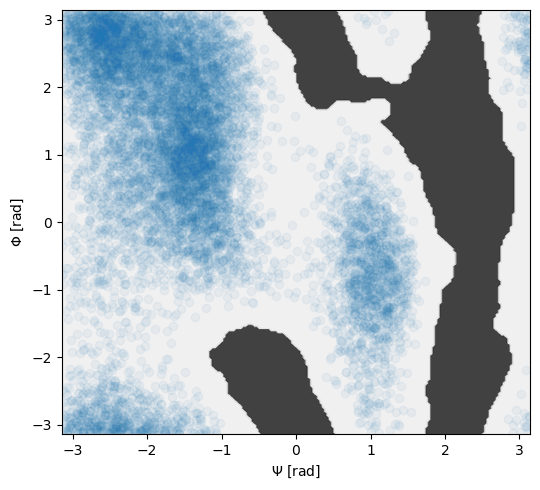

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(5.5, 5))

cp = axs.contourf(X, Y, cutoff, cmap='gray', antialiased=False, alpha=0.8);
#cbar = plt.colorbar(cp, ax=axs)
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

cp=axs.scatter(HILLS[0:NH,1],HILLS[0:NH,2],alpha=0.05);
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()


plt.savefig('Figure1B_3', dpi=600, bbox_inches='tight')

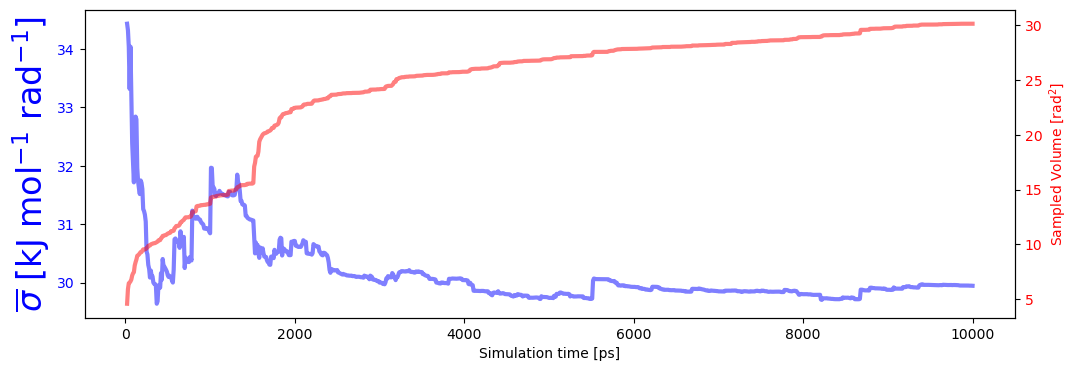

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
axs.plot( [time for time in time_history[1:]], (ofe_history[1:NH]),color='blue',alpha=0.5,linewidth=3);
axs.set_ylabel('$\overline{\sigma}$ [kJ mol$^{-1}$ rad$^{-1}$]',fontsize=24, color='blue')
axs.tick_params(axis ='y', labelcolor = 'blue')
axs.set_xlabel('Simulation time [ps]')

V=np.multiply(volume_history[1:NH],np.power(2*np.pi,2))
ax2 = axs.twinx()
ax2.set_xlabel('Simulation steps')
ax2.set_ylabel('Sampled Volume [rad$^2$]',color='red')
ax2.tick_params(axis ='y', labelcolor = 'red')
ax2.plot( [time for time in time_history[1:]], np.multiply(volume_history[1:NH],np.power(2*np.pi,2)),color='red',alpha=0.5,linewidth=3);

plt.savefig('Figure1B_2', dpi=600, bbox_inches='tight')

|500/500|==> Average Mean Force Error: 30.124356701745022


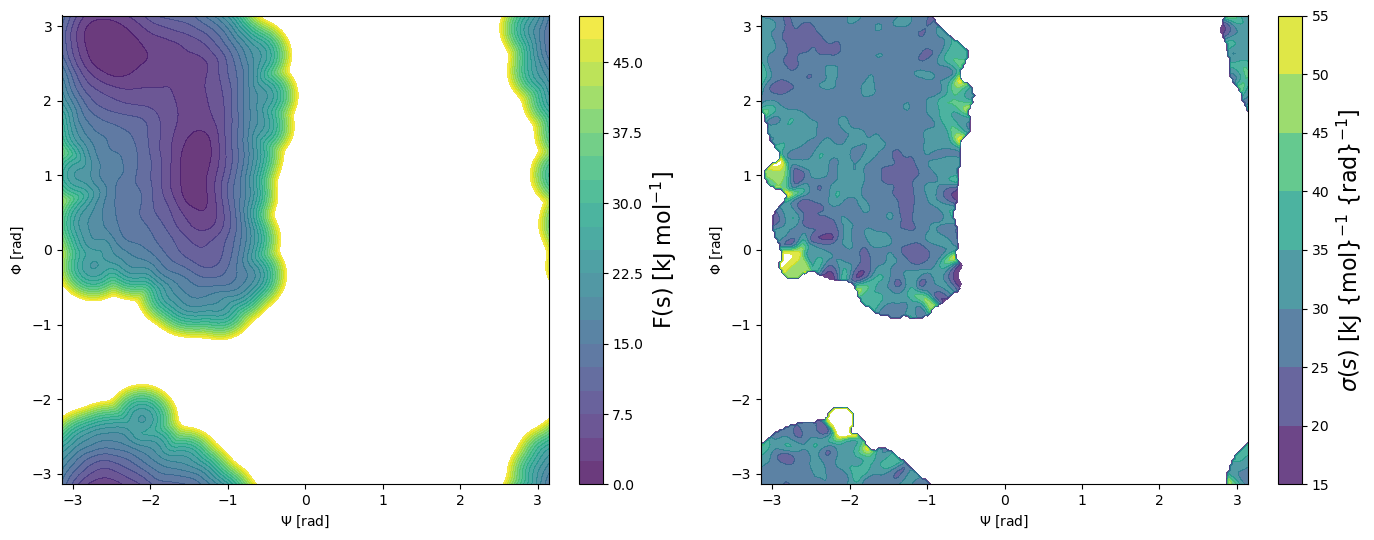

In [10]:
NH=500

# #Compute the time-independent mean force
results2 = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = 500, error_pace = 1, WellTempered=1, nhills=NH, periodic=1)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results2

# #integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-np.pi, -np.pi)), max_grid=np.array((np.pi, np.pi)), periodic=1)

fig, axs = plt.subplots(1, 2, figsize=(14, 5.5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 51, 2.5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_ylabel('$\Phi$ [rad]')
axs[0].set_xlabel('$\Psi$ [rad]')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(15, 60, 5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$ {rad}$^{-1}$]",fontsize=16)
axs[1].set_ylabel('$\Phi$ [rad]')
axs[1].set_xlabel('$\Psi$ [rad]')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()   



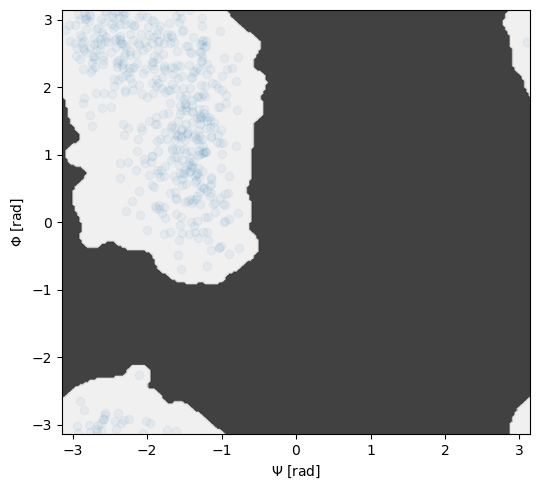

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(5.5, 5))

cp = axs.contourf(X, Y, cutoff, cmap='gray', antialiased=False, alpha=0.8);
#cbar = plt.colorbar(cp, ax=axs)
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

cp=axs.scatter(HILLS[0:NH,1],HILLS[0:NH,2],alpha=0.05);
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()


plt.savefig('Figure1B_4', dpi=600, bbox_inches='tight')

|400/2000|==> Average Mean Force Error: 29.92723477882012
|800/2000|==> Average Mean Force Error: 31.133343127252186
|1200/2000|==> Average Mean Force Error: 31.478291550401494
|1600/2000|==> Average Mean Force Error: 30.555739555237874
|2000/2000|==> Average Mean Force Error: 30.713383568308927


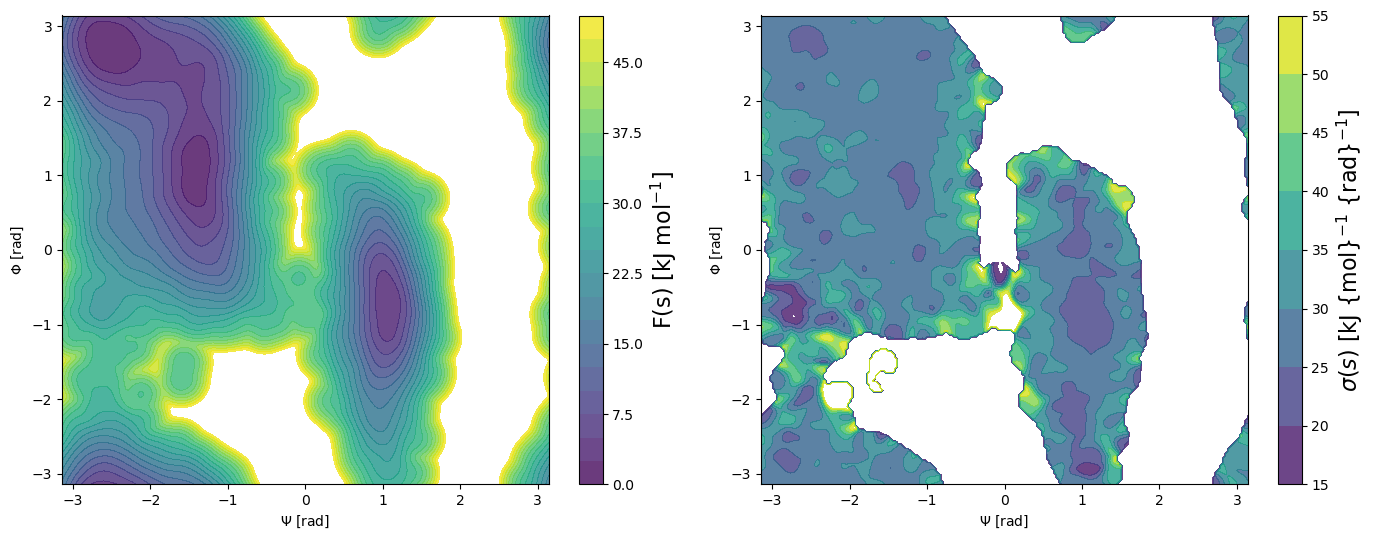

In [12]:
NH=2000

##Compute the time-independent mean force
results3 = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.1, kT = 2.49, log_pace = NH/5, error_pace = 100, WellTempered=1, nhills=NH, periodic=1)
[X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = results3

##integration with the FFT method
[X, Y, FES] = MFI.FFT_intg_2D(Ftot_x, Ftot_y, min_grid=np.array((-np.pi, -np.pi)), max_grid=np.array((np.pi, np.pi)), periodic=1)

fig, axs = plt.subplots(1, 2, figsize=(14, 5.5))
cp = axs[0].contourf(X, Y, FES, levels=np.arange(0, 51, 2.5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[0])
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs[0].set_ylabel('$\Phi$ [rad]')
axs[0].set_xlabel('$\Psi$ [rad]')
axs[0].set_xlim(np.min(X),np.max(X))
axs[0].set_ylim(np.min(Y),np.max(Y))


cp = axs[1].contourf(X, Y, ofe*cutoff, levels=np.arange(15, 60, 5), cmap='viridis', antialiased=False, alpha=0.8);
cbar = plt.colorbar(cp, ax=axs[1])
cbar.set_label("$\sigma(s)$ [kJ {mol}$^{-1}$ {rad}$^{-1}$]",fontsize=16)
axs[1].set_ylabel('$\Phi$ [rad]')
axs[1].set_xlabel('$\Psi$ [rad]')
axs[1].set_xlim(np.min(X),np.max(X))
axs[1].set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()  

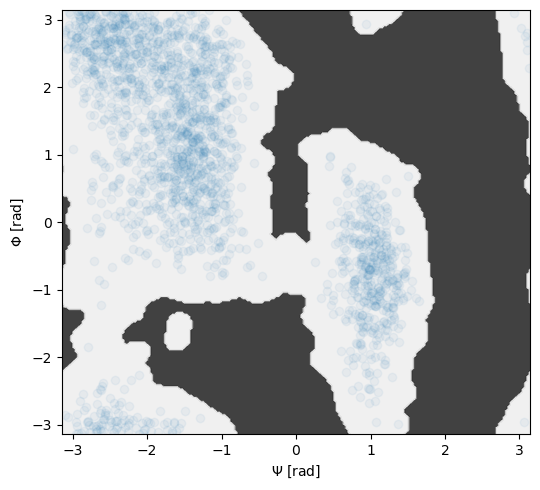

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(5.5, 5))

cp = axs.contourf(X, Y, cutoff, cmap='gray', antialiased=False, alpha=0.8);
#cbar = plt.colorbar(cp, ax=axs)
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

cp=axs.scatter(HILLS[0:NH,1],HILLS[0:NH,2],alpha=0.05);
cbar.set_label("F(s) [kJ mol$^{-1}$]",fontsize=16)
axs.set_ylabel('$\Phi$ [rad]')
axs.set_xlabel('$\Psi$ [rad]')
axs.set_xlim(np.min(X),np.max(X))
axs.set_ylim(np.min(Y),np.max(Y))

fig.tight_layout()


plt.savefig('Figure1B_5', dpi=600, bbox_inches='tight')